I try to reproduce the notebook from https://colab.research.google.com/github/gbrammer/eazy-py/blob/master/docs/examples/HDFN-demo.ipynb#scrollTo=-fcqHKo4-HU-

In [1]:
import importlib
import sys
import time
print(time.ctime() + '\n')

print(sys.version + '\n')

for module in ['numpy', 'scipy', 'matplotlib','astropy','eazy', 'prospect']:
    #print(module)
    mod = importlib.import_module(module)
    print('{0:>20} : {1}'.format(module, mod.__version__))

Fri Dec 30 16:38:28 2022

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]

               numpy : 1.21.2
               scipy : 1.3.0
          matplotlib : 3.3.3
             astropy : 4.0.1.post1
                eazy : 0.6.1


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='

            prospect : 1.1.0


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import eazy

# Symlink templates & filters from the eazy-code repository
try:
    print('EAZYCODE = '+os.getenv('EAZYCODE'))
except:
    pass

if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs() 

In [3]:
# quiet numpy/astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

In [4]:
parameter_file = '/Users/philipp/Documents/PhD/lum_func_measurement/default_params_kcorrect.txt'
translate_file = '/Users/philipp/Documents/Codes/EAZY/eazy-photoz/inputs/zphot.translate'

In [5]:
self = eazy.photoz.PhotoZ(param_file=parameter_file, translate_file=translate_file, zeropoint_file=None, 
                          load_prior=True, load_products=False)

Read default param file: /Users/philipp/Documents/PhD/lum_func_measurement/default_params_kcorrect.txt
Read CATALOG_FILE: /Users/philipp/Documents/Codes/EAZY/eazy-photoz/inputs/hdfn_fs99_eazy.cat
   >>> NOBJ = 1067
f_f300w e_f300w ( 10): hst/wfpc2_f300w.dat
f_f450w e_f450w ( 12): hst/wfpc2_f450w.dat
f_f606w e_f606w ( 14): hst/wfpc2_f606w.dat
f_f814w e_f814w ( 16): hst/wfpc2_f814w.dat
f_irimj e_irimj ( 26): KPNO/IRIMJ
f_irimh e_irimh ( 27): KPNO/IRIMH
f_irimk e_irimk ( 28): KPNO/IRIMK
Set sys_err = 0.01 (positive=True)
Read PRIOR_FILE:  templates/prior_K_TAO.dat
Template grid: templates/br07_default.spectra.param (this may take some time)


100%|██████████| 5/5 [00:57<00:00, 11.53s/it]


Template   0: default_sed1_ext.dat (NZ=1).
Template   1: default_sed2_ext.dat (NZ=1).
Template   2: default_sed3_ext.dat (NZ=1).
Template   3: default_sed4_ext.dat (NZ=1).
Template   4: default_sed5_ext.dat (NZ=1).
Process templates: 59.049 s


194it [00:00, 2461.30it/s]


In [6]:
sn = self.fnu/self.efnu
clip = (sn > 1).sum(axis=1)
print(sn)
print(clip)
print(self.idx[clip])

[[ 2.2927704  45.047825   90.64519    ... 83.163345   77.033394
  86.50646   ]
 [ 4.0884085  11.481666   23.677055   ...  3.2568836   1.9236943
  -0.37704888]
 [-0.8883307   0.1848106   2.2099898  ...  0.8690576   3.022296
   1.0333499 ]
 ...
 [ 7.590707   19.130424   36.770638   ...  2.5958164   0.8170461
   1.383794  ]
 [ 1.2421829  15.421252   25.941639   ... -0.694853   -0.81605333
   0.16458021]
 [93.82322    99.72571    99.94765    ... 97.59046    92.90924
  93.57483   ]]
[7 6 4 ... 6 4 7]
[7 6 4 ... 6 4 7]


In [7]:
print(self.fnu)
print(self.efnu)

[[ 1.70771e-01  1.91405e+00  5.69421e+00 ...  8.45730e+01  1.19146e+02
   1.57714e+02]
 [ 7.73278e-02  1.12397e-01  1.70523e-01 ...  1.56198e+00  1.67493e+00
  -3.16804e-01]
 [-1.95041e-02  2.01102e-03  1.73554e-02 ...  6.58402e-01  4.22314e+00
   1.36364e+00]
 ...
 [ 2.38237e-01  3.05510e-01  4.26997e-01 ...  1.29477e+00  7.38292e-01
   1.28099e+00]
 [ 2.88154e-02  1.73278e-01  2.07934e-01 ... -5.20661e-01 -1.34435e+00
   2.53444e-01]
 [ 3.72452e+01  9.52066e+01  1.62204e+02 ...  2.92011e+02  3.14876e+02
   3.28926e+02]]
[[0.07448238 0.04248929 0.06281867 ... 1.0169504  1.54668    1.823147  ]
 [0.01891391 0.00978926 0.00720204 ... 0.47959343 0.8706841  0.84022   ]
 [0.0219559  0.01088152 0.00785316 ... 0.7576046  1.3973284  1.3196305 ]
 ...
 [0.03138535 0.01596985 0.01161245 ... 0.49879107 0.9036112  0.92570865]
 [0.02319739 0.01123631 0.00801545 ... 0.749311   1.64738    1.539942  ]
 [0.39697212 0.95468456 1.6228895  ... 2.9922082  3.389071   3.515112  ]]


Iteration:  0


100%|██████████| 194/194 [00:06<00:00, 30.32it/s]


Compute best fits
fit_best: 0.2 s (n_proc=1,  NOBJ=640)
Fit 6.9 s (n_proc=8, NOBJ=645)
Iterative correction - zeropoint / template
Iteration:  1


100%|██████████| 194/194 [00:06<00:00, 28.76it/s]


Compute best fits
fit_best: 0.2 s (n_proc=1,  NOBJ=636)
Fit 7.3 s (n_proc=8, NOBJ=645)
Iterative correction - zeropoint / template
Iteration:  2


100%|██████████| 194/194 [00:06<00:00, 28.60it/s]


Compute best fits
fit_best: 0.3 s (n_proc=1,  NOBJ=638)
Fit 7.3 s (n_proc=8, NOBJ=645)
Iterative correction - zeropoint / template


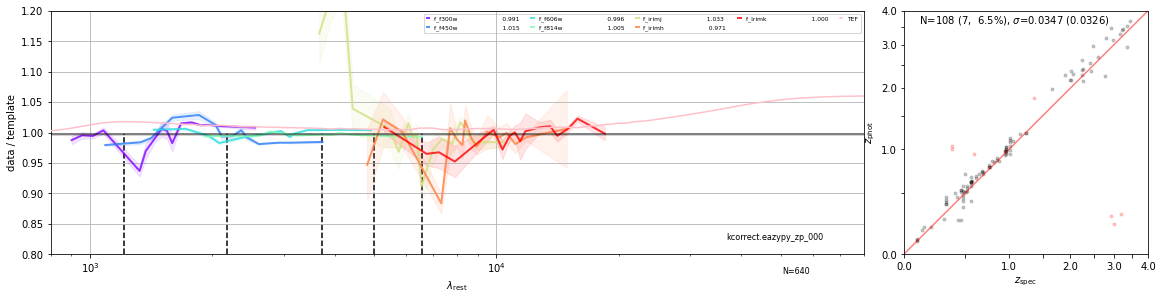

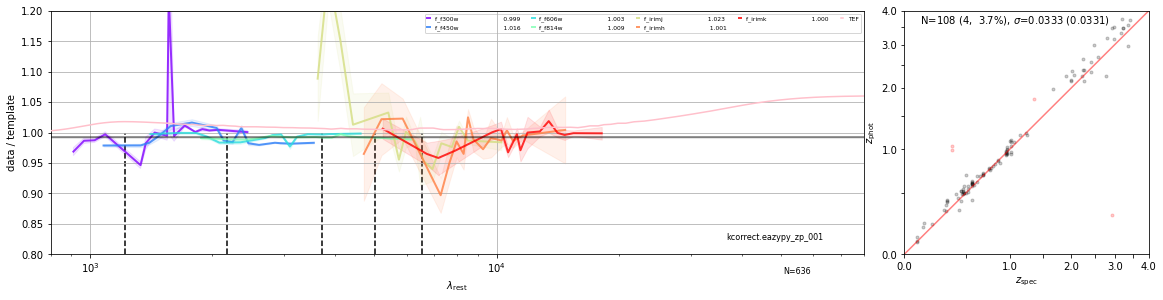

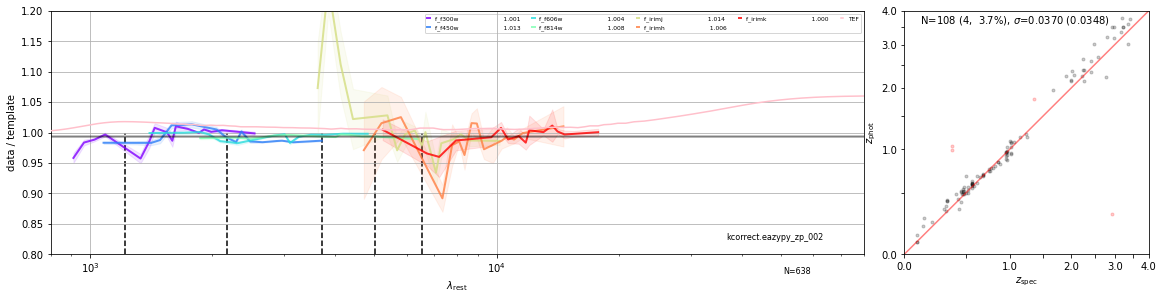

In [8]:
NITER = 3
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter in range(NITER):
    print('Iteration: ', iter)
    
    sn = self.fnu/self.efnu
    clip = (sn > 1).sum(axis=1) > 4 # Generally make this higher to ensure reasonable fits
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                              update_zeropoints=True, iter=iter, n_proc=8, 
                              save_templates=False, error_residuals=False, 
                              NBIN=NBIN, get_spatial_offset=False)

In [9]:
# Turn off error corrections derived above
self.set_sys_err(positive=True)

# Full catalog
sample = np.isfinite(self.ZSPEC)

# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx[sample], n_proc=4)

Set sys_err = 0.01 (positive=True)


100%|██████████| 194/194 [00:15<00:00, 12.48it/s]


Compute best fits
fit_best: 0.3 s (n_proc=1,  NOBJ=1020)
Fit 16.1 s (n_proc=4, NOBJ=1067)


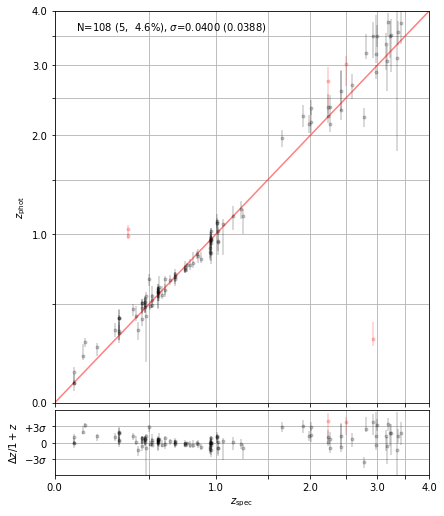

In [10]:
# Show zspec-zphot comparison
fig = self.zphot_zspec()

In [11]:
# Derived parameters (z params, RF colors, masses, SFR, etc.)
warnings.simplefilter('ignore', category=RuntimeWarning)
zout, hdu = self.standard_output(simple=False, 
                                 rf_pad_width=0.5, rf_max_err=2, 
                                 prior=True, beta_prior=True, 
                                 absmag_filters=[], 
                                 extra_rf_filters=[])

# 'zout' also saved to [MAIN_OUTPUT_FILE].zout.fits

Get best fit coeffs & best redshifts
fit_best: 2.3 s (n_proc=1,  NOBJ=1048)
Get parameters (UBVJ=[153, 154, 155, 161], simple=False)


100%|██████████| 1048/1048 [00:12<00:00, 87.13it/s]



 Couldn't find template parameters file templates/br07_default.spectra.param.fits for population synthesis 
 calculations.
            


Text(0, 0.5, '$(U-V)_0$')

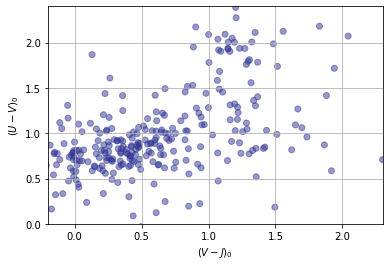

In [12]:
# Show UVJ diagram
uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])
ssfr = zout['sfr']/zout['mass']

sel = (zout['z_phot'] > 0.2) & (zout['z_phot'] < 1)
plt.scatter(vj[sel], uv[sel], c=np.log10(ssfr)[sel], 
            vmin=-13, vmax=-8, alpha=0.5, cmap='RdYlBu')

plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4); plt.grid()
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$') 

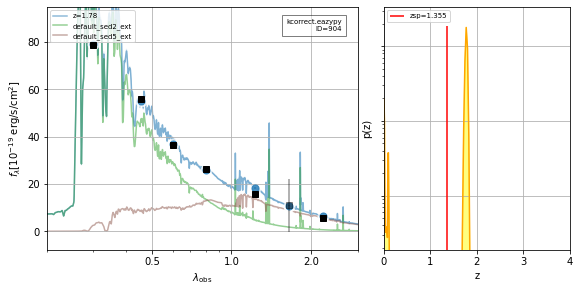

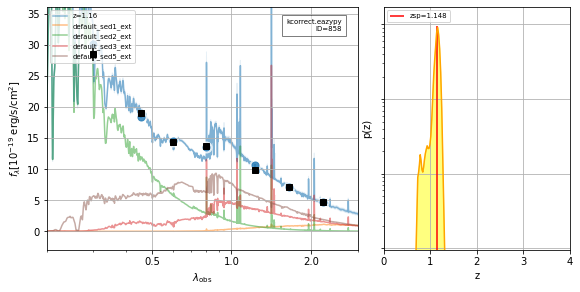

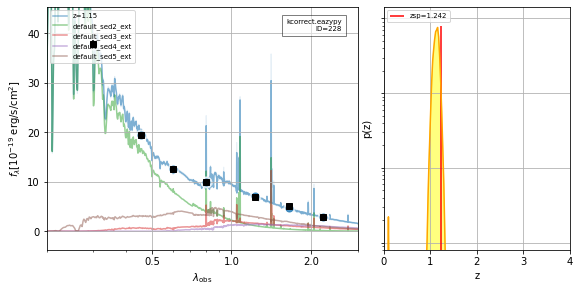

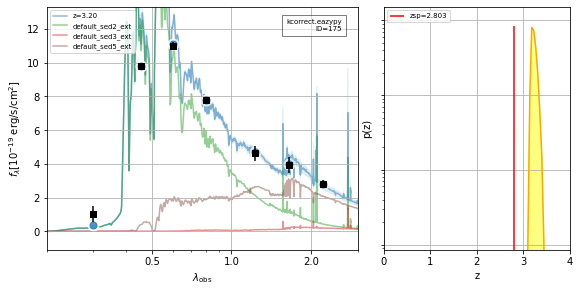

In [13]:
# Show brightest objects with z_spec > 1

ifilter = self.flux_columns[np.argmin((self.lc - 8140)**2)]

imag = 25 - 2.5*np.log10(self.cat[ifilter])
sel = (self.ZSPEC > 1.1)

so = np.argsort(imag[sel])
ids = self.OBJID[sel][so]

for i in range(4):
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3], show_components=True,
                              logpz=True, zr=[0,4])

In [14]:
zout.info()

<Table length=1067>
    name      dtype  shape       unit       format        description        
------------ ------- ----- ---------------- ------ --------------------------
          id   int64                                                         
      z_spec float64                                                         
    nusefilt   int64                                                         
        z_ml float32                                                         
   z_ml_chi2 float32                                                         
   z_ml_risk float32                                                         
      lc_min float64                           .1f                           
      lc_max float64                           .1f                           
      z_phot float32                                                         
 z_phot_chi2 float32                                                         
 z_phot_risk float32                        

In [15]:
print(zout['z_spec'])
print(zout['z_phot'])

z_spec
------
  -1.0
  -1.0
  5.34
  1.02
  -1.0
  -1.0
  -1.0
  -1.0
  -1.0
  -1.0
   ...
  -1.0
  -1.0
  -1.0
  -1.0
  -1.0
 2.267
  -1.0
  -1.0
  -1.0
  -1.0
 0.139
Length = 1067 rows
  z_phot  
----------
 0.9389422
0.99924254
 5.9584055
 0.9375654
 1.1784316
 0.6541852
 1.0504508
0.93952006
 1.2263151
0.57966673
       ...
 0.3751704
 0.6498868
  1.803022
 2.3389962
 1.9220856
   2.36452
0.41507998
  3.049364
 0.7563553
 2.3777316
 0.2855695
Length = 1067 rows


In [16]:
print(hdu.info())

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  ZBEST         1 ImageHDU         7   (1067,)   float32   
  2  ZGRID         1 ImageHDU         7   (194,)   float32   
  3  CHI2          1 ImageHDU        10   (194, 1067)   float32   
  4  COEFFS        1 ImageHDU        15   (5, 1067)   float32   
None


In [17]:
hdu[4].data

array([[4.76430355e+22, 0.00000000e+00, 3.13377463e+22, 3.11285960e+23,
        0.00000000e+00],
       [0.00000000e+00, 6.72987978e+17, 7.86450092e+20, 0.00000000e+00,
        4.83175503e+19],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [8.92789456e+19, 2.29666772e+18, 6.99171950e+20, 0.00000000e+00,
        1.35352635e+20],
       [0.00000000e+00, 1.36651236e+18, 0.00000000e+00, 0.00000000e+00,
        6.41552967e+20],
       [8.72892994e+22, 8.11401142e+19, 0.00000000e+00, 2.10638813e+23,
        1.14819164e+23]], dtype=float32)

In [ ]:
hd